In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [22]:
df = pd.read_csv('C:\\Users\\jaybp\\Documents\\Code and junk\\game_sales_data.csv')
scaled = df[['Total_Shipped']] = minmax_scale(df[['Total_Shipped']])

In [25]:
df

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,1.000000,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,0.485342,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,0.482447,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,0.450115,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,0.441428,2017
...,...,...,...,...,...,...,...,...,...
19595,19594,FirePower for Microsoft Combat Flight Simulator 3,PC,GMX Media,Shockwave Productions,NaN,NaN,0.000000,2004
19596,19595,Tom Clancy's Splinter Cell,PC,Ubisoft,Ubisoft,9.4,NaN,0.000000,2003
19597,19596,Ashita no Joe 2: The Anime Super Remix,PS2,Capcom,Capcom,NaN,NaN,0.000000,2002
19598,19597,Tokyo Yamanote Boys for V: Main Disc,PSV,Rejet,Rejet,NaN,NaN,0.000000,2017


In [26]:
df.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Year
count,19600.000000,9969.000000,2223.000000,19600.000000,19600.000000
mean,9798.539133,7.034848,6.994872,0.006528,2007.789949
std,5658.110539,1.558968,1.517038,0.020165,6.326169
min,1.000000,0.800000,1.000000,0.000000,1977.000000
25%,4898.750000,6.100000,6.300000,0.000483,2004.000000
50%,9798.500000,7.300000,7.200000,0.001810,2008.000000
75%,14698.250000,8.200000,8.000000,0.005429,2012.000000
max,19598.000000,10.000000,10.000000,1.000000,2020.000000


In [27]:
print(len(df))

19600


<function matplotlib.pyplot.show(close=None, block=None)>

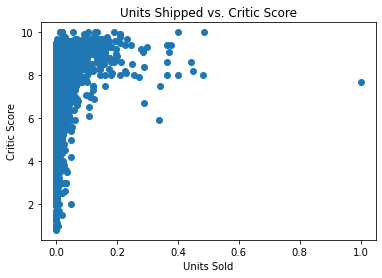

In [28]:
#Plot Units sold in Millions against Critic Score on Metacritic
x = df['Total_Shipped']
y = df['Critic_Score']
plt.title('Units Shipped vs. Critic Score')
plt.xlabel('Units Sold')
plt.ylabel('Critic Score')           
plt.scatter(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

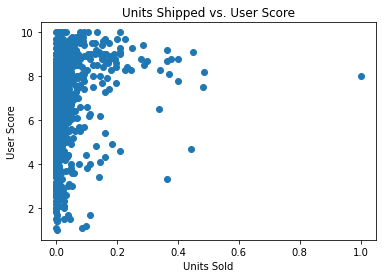

In [29]:
#Plot Units sold in Millions against Consumer Score on Metacritic
x = df['Total_Shipped']
y = df['User_Score']
plt.title('Units Shipped vs. User Score')
plt.xlabel('Units Sold')
plt.ylabel('User Score')           
plt.scatter(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

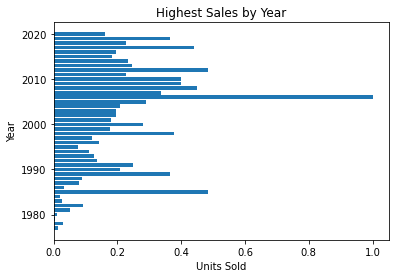

In [30]:
#Plot highest sales figures of games per year
x= df["Year"]
y= df['Total_Shipped']
plt.title('Highest Sales by Year')
plt.xlabel('Units Sold')
plt.ylabel('Year')    
plt.barh(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

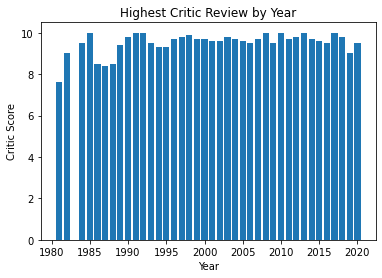

In [31]:
#Plot highest critic score per year
x= df["Year"]
y= df['Critic_Score']
plt.title('Highest Critic Review by Year')
plt.xlabel('Year')
plt.ylabel('Critic Score')    
plt.bar(x,y)
plt.show

In [32]:
#create correlation matrix to help determine feature importance
df.corr()

,Rank,Critic_Score,User_Score,Total_Shipped,Year
Rank,1.000000,-0.349772,-0.203942,-0.420119,0.189437
Critic_Score,-0.349772,1.000000,0.515379,0.235779,0.053852
User_Score,-0.203942,0.515379,1.000000,0.147828,-0.246976
Total_Shipped,-0.420119,0.235779,0.147828,1.000000,-0.048958
Year,0.189437,0.053852,-0.246976,-0.048958,1.000000


In [33]:
df = df.dropna()
df

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,1.000000,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,0.485342,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,0.482447,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,0.450115,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,0.441428,2017
...,...,...,...,...,...,...,...,...,...
19464,19463,Teslagrad,PS4,Rain Games,Rain Games,7.8,6.7,0.000000,2014
19496,19495,Sega 3D Classics Collection,3DS,Sega,M2,7.3,7.5,0.000000,2016
19507,19506,Happy Birthdays,NS,NIS America,Arc System Works,8.5,7.0,0.000000,2018
19525,19524,The Mighty Quest for Epic Loot,PC,Ubisoft,Ubisoft,6.4,5.6,0.000000,2015


In [34]:
#Dropping the column "Rank" from the data frame as it is redundant with sales and doesn't actually provide any insight beyond what we get from sales numbers.
df2 = df.drop('Rank',axis = 1)

In [35]:
#grouping the data by developer and taking the average of the scores of each developer.
dftest = df.groupby(['Developer'], as_index=False).mean()
dftest

,Developer,Rank,Critic_Score,User_Score,Total_Shipped,Year
0,11 bit studios,2875.000000,8.150000,7.850000,0.011763,2014.500000
1,1C Company,10735.000000,7.200000,5.200000,0.001448,2011.000000
2,1C: Maddox Games,14779.000000,5.000000,7.100000,0.000483,2011.000000
3,2K Australia / 2K Boston,644.000000,9.600000,9.500000,0.034021,2007.000000
4,2K Boston / 2K Australia / 2K Marin,1597.000000,9.300000,9.600000,0.017252,2008.000000
...,...,...,...,...,...,...
712,imageepoch Inc.,7336.000000,7.500000,8.000000,0.003016,2015.000000
713,n-Space,9405.000000,6.366667,6.500000,0.001970,2009.666667
714,stillalive studios,9959.000000,4.600000,6.000000,0.001689,2017.000000
715,syn Sophia,4780.333333,7.600000,6.766667,0.008324,2016.333333


<function matplotlib.pyplot.show(close=None, block=None)>

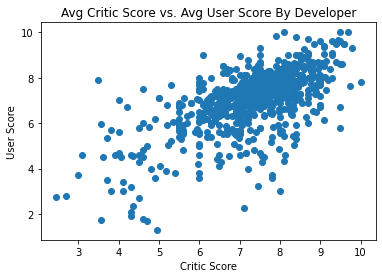

In [36]:
x = dftest['Critic_Score']
y = dftest['User_Score']
plt.title('Avg Critic Score vs. Avg User Score By Developer')
plt.xlabel('Critic Score')
plt.ylabel('User Score')           
plt.scatter(x,y)
plt.show

In [39]:
#Getting a linear regression score for the data
df.fillna(method ='ffill', inplace = True)
  
X = np.array(df['User_Score']).reshape(-1, 1)
y = np.array(df['Critic_Score']).reshape(-1, 1)
  
df.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.2756025531819333


C:\Users\jaybp\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-39-299e5c1ef7d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


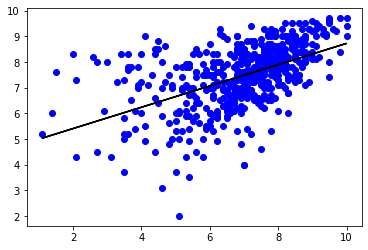

In [40]:
#plotting the regression using seaborn
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [41]:
#Getting a linear regression score for the data for the grouped data frame using the averages of the scores per developer to show the relationship between the user score and the critic score.
X = np.array(df['User_Score']).reshape(-1, 1)
y = np.array(df['Critic_Score']).reshape(-1, 1)
  
dftest.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.24998370225864086


In [42]:
X = np.array(df['User_Score']).reshape(-1, 1)
y = np.array(df['Total_Shipped']).reshape(-1, 1)
  
dftest.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.04002984194116321


In [43]:
X = np.array(df['Critic_Score']).reshape(-1, 1)
y = np.array(df['Total_Shipped']).reshape(-1, 1)
  
dftest.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.08815759788236821
